# Color-based Features


Color-based feature extraction techniques leverage the color information within an image to derive meaningful features. These techniques are widely used in image processing, computer vision, and pattern recognition.

## Importing the libraries


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Importing the image


In [32]:
image = cv2.imread("./bird.jpg")

## Convertion of BGR to RGB


In [33]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Visualizing the RGB image


(-0.5, 639.5, 680.5, -0.5)

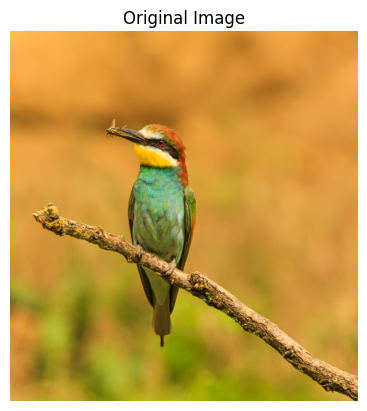

In [34]:
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

## Color Histograms


Color histograms represent the distribution of colors in an image. They count the number of pixels for each channel(color) in a fixed set of color bins.

### Calculation the Histogram for each channel


In [35]:
# Calculates histograms for each channel
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256]).flatten()
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256]).flatten()
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256]).flatten()

### Normalizing the Histograms

Normalization is important because it ensures that the histogram values are independent of the image size and total number of pixels. This allows for consistent comparison between histograms from different images, regardless of their dimensions. Normalized histograms provide a probability distribution of pixel intensities, which is useful in various image processing tasks, such as image comparison, feature extraction, and image recognition.

In [36]:
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

### Visualizing the Histograms


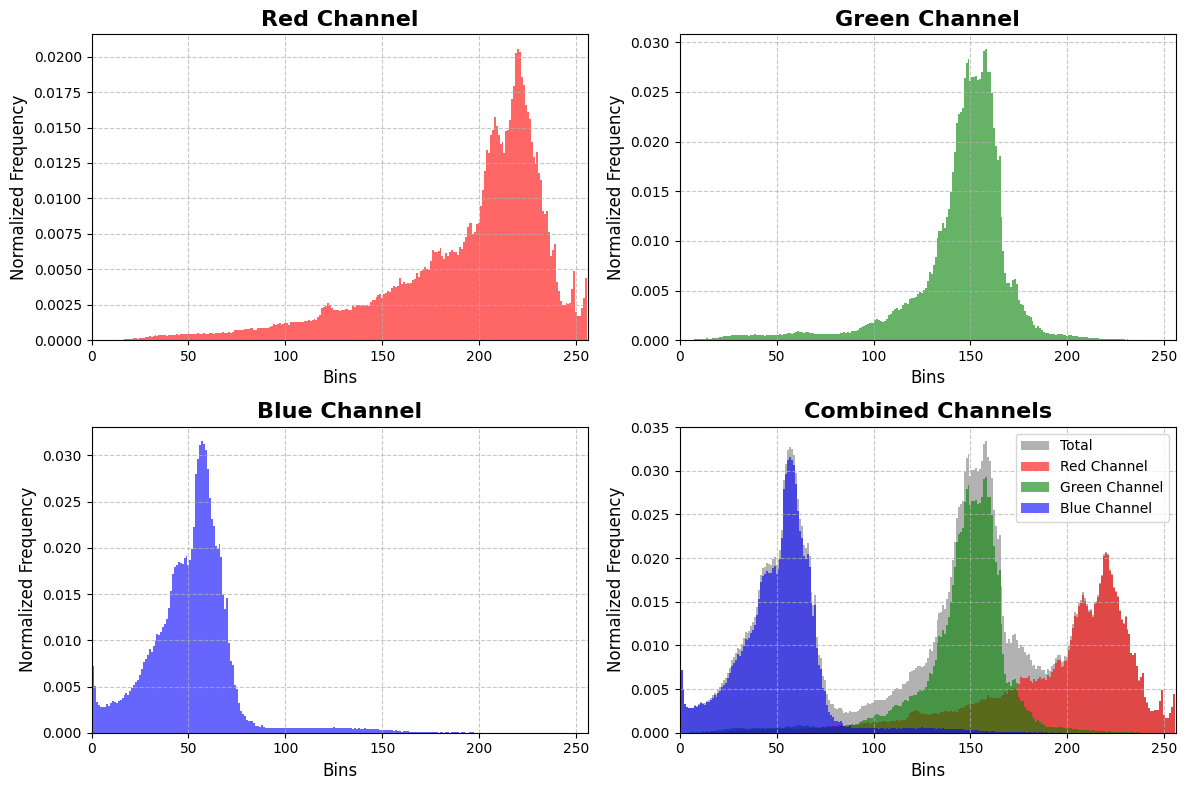

In [37]:
# Create a figure with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8), facecolor='white')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot individual Red channel in the top-left subplot
axs[0, 0].bar(range(256), hist_r, color='r', width=1.0, alpha=0.6)
axs[0, 0].set_xlim([0, 256])
axs[0, 0].set_title("Red Channel", fontsize=16, fontweight='bold')
axs[0, 0].set_xlabel("Bins", fontsize=12)
axs[0, 0].set_ylabel("Normalized Frequency", fontsize=12)
axs[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot individual Green channel in the top-right subplot
axs[0, 1].bar(range(256), hist_g, color='g', width=1.0, alpha=0.6)
axs[0, 1].set_xlim([0, 256])
axs[0, 1].set_title("Green Channel", fontsize=16, fontweight='bold')
axs[0, 1].set_xlabel("Bins", fontsize=12)
axs[0, 1].set_ylabel("Normalized Frequency", fontsize=12)
axs[0, 1].grid(True, linestyle='--', alpha=0.7)

# Plot individual Blue channel in the bottom-left subplot
axs[1, 0].bar(range(256), hist_b, color='b', width=1.0, alpha=0.6)
axs[1, 0].set_xlim([0, 256])
axs[1, 0].set_title("Blue Channel", fontsize=16, fontweight='bold')
axs[1, 0].set_xlabel("Bins", fontsize=12)
axs[1, 0].set_ylabel("Normalized Frequency", fontsize=12)
axs[1, 0].grid(True, linestyle='--', alpha=0.7)

# Plot combined histogram in the bottom-right subplot
hist_total = hist_r + hist_g + hist_b
axs[1, 1].bar(range(256), hist_total, color='gray', width=1.0, alpha=0.6, label='Total')
axs[1, 1].bar(range(256), hist_r, color='r', width=1.0, alpha=0.6, label='Red Channel')
axs[1, 1].bar(range(256), hist_g, color='g', width=1.0, alpha=0.6, label='Green Channel')
axs[1, 1].bar(range(256), hist_b, color='b', width=1.0, alpha=0.6, label='Blue Channel')
axs[1, 1].set_xlim([0, 256])
axs[1, 1].set_title("Combined Channels", fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel("Bins", fontsize=12)
axs[1, 1].set_ylabel("Normalized Frequency", fontsize=12)
axs[1, 1].legend(loc='upper right', fontsize=10)
axs[1, 1].grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

## Color Moments


Color moments are measures that can be used differentiate images based on their features of color. Once calculated, these moments provide a measurement for color similarity between images. The mean, standard deviation and skewness are commonly used color moments

- __Mean:__ Mean can be understood as the average color value in the image.
$$
E_i = \frac{1}{N} \sum_{j=1}^{N} p_{ij}
$$

- __Standard Deviation:__ The standard deviation is the square root of the variance of the distribution.
$$
\sigma_i = \sqrt{(\frac{1}{N} \sum_{j=1}^{N} \left( p_{ij} - E_i \right)^2)}
$$

- __Skewness:__ Skewness can be understood as a measure of the degree of asymmetry in the distribution.
$$
s_i = \sqrt[3]{(\frac{1}{N} \sum_{j=1}^{N} \left( p_{ij} - E_i \right)^3)}
$$


### Calculating the mean, variance and skewness for each channel


In [38]:
from scipy.stats import skew

# Splitting the channels
channels = cv2.split(image_rgb)
mean = []
std_deviation = []
skewness = []

# Calculating the mean, variance and skewness for each channel
for channel in channels:
    mean.append(np.mean(channel))
    std_deviation.append(np.std(channel))
    skewness.append(skew(channel.flatten()))

In [39]:
print("Mean:", mean)
print("Standard Deviation:", std_deviation)
print("Skewness:", skewness)

Mean: [193.35006194933922, 144.73415014684286, 50.65729396108664]
Standard Deviation: [42.22622533828454, 26.414928112645917, 22.913644242978894]
Skewness: [-1.393137198609348, -1.857558189713299, 0.8611079145556424]


## Color Correlogram

Color correlogram captures the spatial correlation of colors, providing information about how colors are spatially distributed. It measures the probability of finding a color pair at a fixed pixel distance.

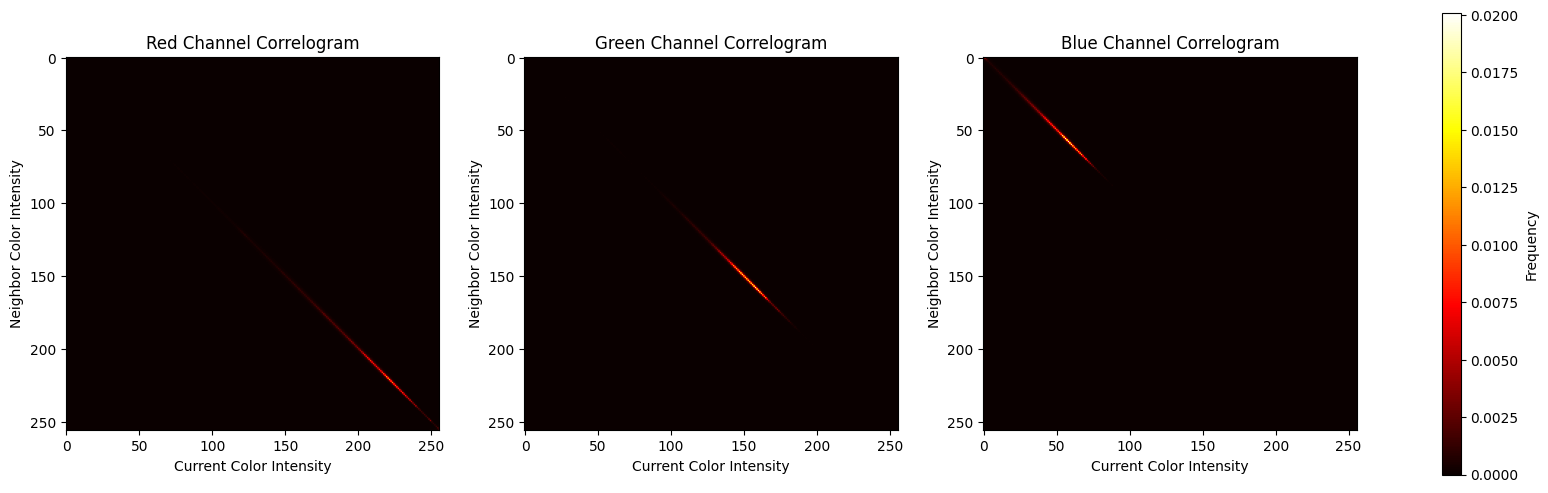

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def color_correlogram(image_rgb, distance):
    height, width, _ = image_rgb.shape

    # Initialize correlogram matrices for each color channel pair (R, G, B)
    correlogram_r = np.zeros((256, 256), dtype=np.float32)
    correlogram_g = np.zeros((256, 256), dtype=np.float32)
    correlogram_b = np.zeros((256, 256), dtype=np.float32)

    # Split the channels
    r_channel, g_channel, b_channel = cv2.split(image_rgb)

    for y in range(height):
        for x in range(width):
            current_r = r_channel[y, x]
            current_g = g_channel[y, x]
            current_b = b_channel[y, x]

            for dy in range(-distance, distance + 1):
                for dx in range(-distance, distance + 1):
                    ny, nx = y + dy, x + dx
                    if 0 <= ny < height and 0 <= nx < width:
                        neighbor_r = r_channel[ny, nx]
                        neighbor_g = g_channel[ny, nx]
                        neighbor_b = b_channel[ny, nx]

                        # Update correlogram matrices for each channel pair
                        correlogram_r[current_r, neighbor_r] += 1
                        correlogram_g[current_g, neighbor_g] += 1
                        correlogram_b[current_b, neighbor_b] += 1

    # Normalize the correlogram matrices
    total_pairs_r = np.sum(correlogram_r)
    total_pairs_g = np.sum(correlogram_g)
    total_pairs_b = np.sum(correlogram_b)

    if total_pairs_r > 0:
        correlogram_r /= total_pairs_r
    if total_pairs_g > 0:
        correlogram_g /= total_pairs_g
    if total_pairs_b > 0:
        correlogram_b /= total_pairs_b

    return correlogram_r, correlogram_g, correlogram_b

# Assuming image_rgb is already defined and loaded
correlogram_r, correlogram_g, correlogram_b = color_correlogram(image_rgb, distance=1)

# Plot the correlograms
fig = plt.figure(figsize=(18, 6))
gs = GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.3)

cmap = 'hot'
vmin = 0
vmax = max(np.max(correlogram_r), np.max(correlogram_g), np.max(correlogram_b))

# Red Channel Correlogram
ax0 = fig.add_subplot(gs[0])
im = ax0.imshow(correlogram_r, cmap=cmap, vmin=vmin, vmax=vmax)
ax0.set_title("Red Channel Correlogram")
ax0.set_xlabel("Current Color Intensity")
ax0.set_ylabel("Neighbor Color Intensity")

# Green Channel Correlogram
ax1 = fig.add_subplot(gs[1])
ax1.imshow(correlogram_g, cmap=cmap, vmin=vmin, vmax=vmax)
ax1.set_title("Green Channel Correlogram")
ax1.set_xlabel("Current Color Intensity")
ax1.set_ylabel("Neighbor Color Intensity")

# Blue Channel Correlogram
ax2 = fig.add_subplot(gs[2])
ax2.imshow(correlogram_b, cmap=cmap, vmin=vmin, vmax=vmax)
ax2.set_title("Blue Channel Correlogram")
ax2.set_xlabel("Current Color Intensity")
ax2.set_ylabel("Neighbor Color Intensity")

# Add a single color bar for all subplots
cbar_ax = fig.add_subplot(gs[3])
fig.colorbar(im, cax=cbar_ax).set_label('Frequency')

plt.show()